In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_airlines = pd.read_csv('EDA_practice/flight/airlines.csv')
df_airports = pd.read_csv('EDA_practice/flight/airports.csv')
df_flights = pd.read_csv('EDA_practice/flight/flights.csv')

In [3]:
print('Dataframe dimensions:', df_flights.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
df_info=pd.DataFrame(df_flights.dtypes).T.rename(index={0:'column type'})
df_info=df_info.append(pd.DataFrame(df_flights.isnull().sum()).T.rename(index={0:'null values (nb)'}))
df_info=df_info.append(pd.DataFrame(df_flights.isnull().sum()/df_flights.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
df_info

Dataframe dimensions: (5819079, 31)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,object,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,14721,0,0,0,86153,86153,89047,89047,6,105071,105071,0,92513,92513,0,92513,105071,0,0,5729195,4755640,4755640,4755640,4755640,4755640
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.252978,0.0,0.0,0.0,1.480526,1.480526,1.530259,1.530259,0.000103,1.805629,1.805629,0.0,1.589822,1.589822,0.0,1.589822,1.805629,0.0,0.0,98.455357,81.72496,81.72496,81.72496,81.72496,81.72496


In [4]:
df_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_flights['Date'] = pd.to_datetime(df_flights[['YEAR', 'MONTH', 'DAY']])

In [6]:
df_flights = df_flights.drop(columns=['YEAR', 'MONTH', 'DAY'])

In [7]:
df_flights

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Date
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819075,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819076,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31
5819077,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-31


In [8]:
df_flights['SCHEDULED_DEPARTURE'].head()

0     5
1    10
2    20
3    20
4    25
Name: SCHEDULED_DEPARTURE, dtype: int64

In [9]:
df_flights = df_flights[pd.to_datetime(df_flights['Date'], format='%Y-%m-%d').dt.month == 1]


In [10]:
#_________________________________________________________
# Function that convert the 'HHMM' string to datetime.time
def format_heuer(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['Date', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heuer(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [11]:
df_flights['SCHEDULED_DEPARTURE'] = create_flight_time(df_flights, 'SCHEDULED_DEPARTURE')
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(format_heuer)
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(format_heuer)
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(format_heuer)
#__________________________________________________________________________
df_flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


In [12]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF','Date', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
df_flights.drop(variables_to_remove, axis = 1, inplace = True)
df_flights[:5]

,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,4,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,205.0,194.0,1448,04:30:00,04:08:00,-22.0
1,4,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,280.0,279.0,2330,07:50:00,07:41:00,-9.0
2,4,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,286.0,293.0,2296,08:06:00,08:11:00,5.0
3,4,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,285.0,281.0,2342,08:05:00,07:56:00,-9.0
4,4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,235.0,215.0,1448,03:20:00,02:59:00,-21.0


In [13]:
day_categories = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
df_flights['DAY_OF_WEEK'] = df_flights['DAY_OF_WEEK'].map(day_categories)


In [14]:
df_flights.dropna(inplace = True)

In [15]:
df_flights.head()

df_flights.to_csv('flight_clean.csv', index=False)

In [16]:
companies = df_airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
companies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [17]:
# # Creation of a dataframe with statitical infos on each airline:
global_stats = df_flights['DEPARTURE_DELAY'].groupby(df_flights['AIRLINE']).agg(['count', 'max', 'mean', 'min'])
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
AIRLINE,,,,
VX,4012,397.0,5.557079,-20.0
HA,5591,1003.0,1.584690,-26.0
F9,5836,588.0,15.750000,-32.0
NK,7508,557.0,12.648641,-28.0
AS,11416,444.0,2.792484,-42.0
B6,17655,500.0,9.193260,-27.0
MQ,24053,780.0,14.719370,-29.0
US,28218,638.0,4.838543,-26.0
UA,32693,886.0,13.122809,-23.0


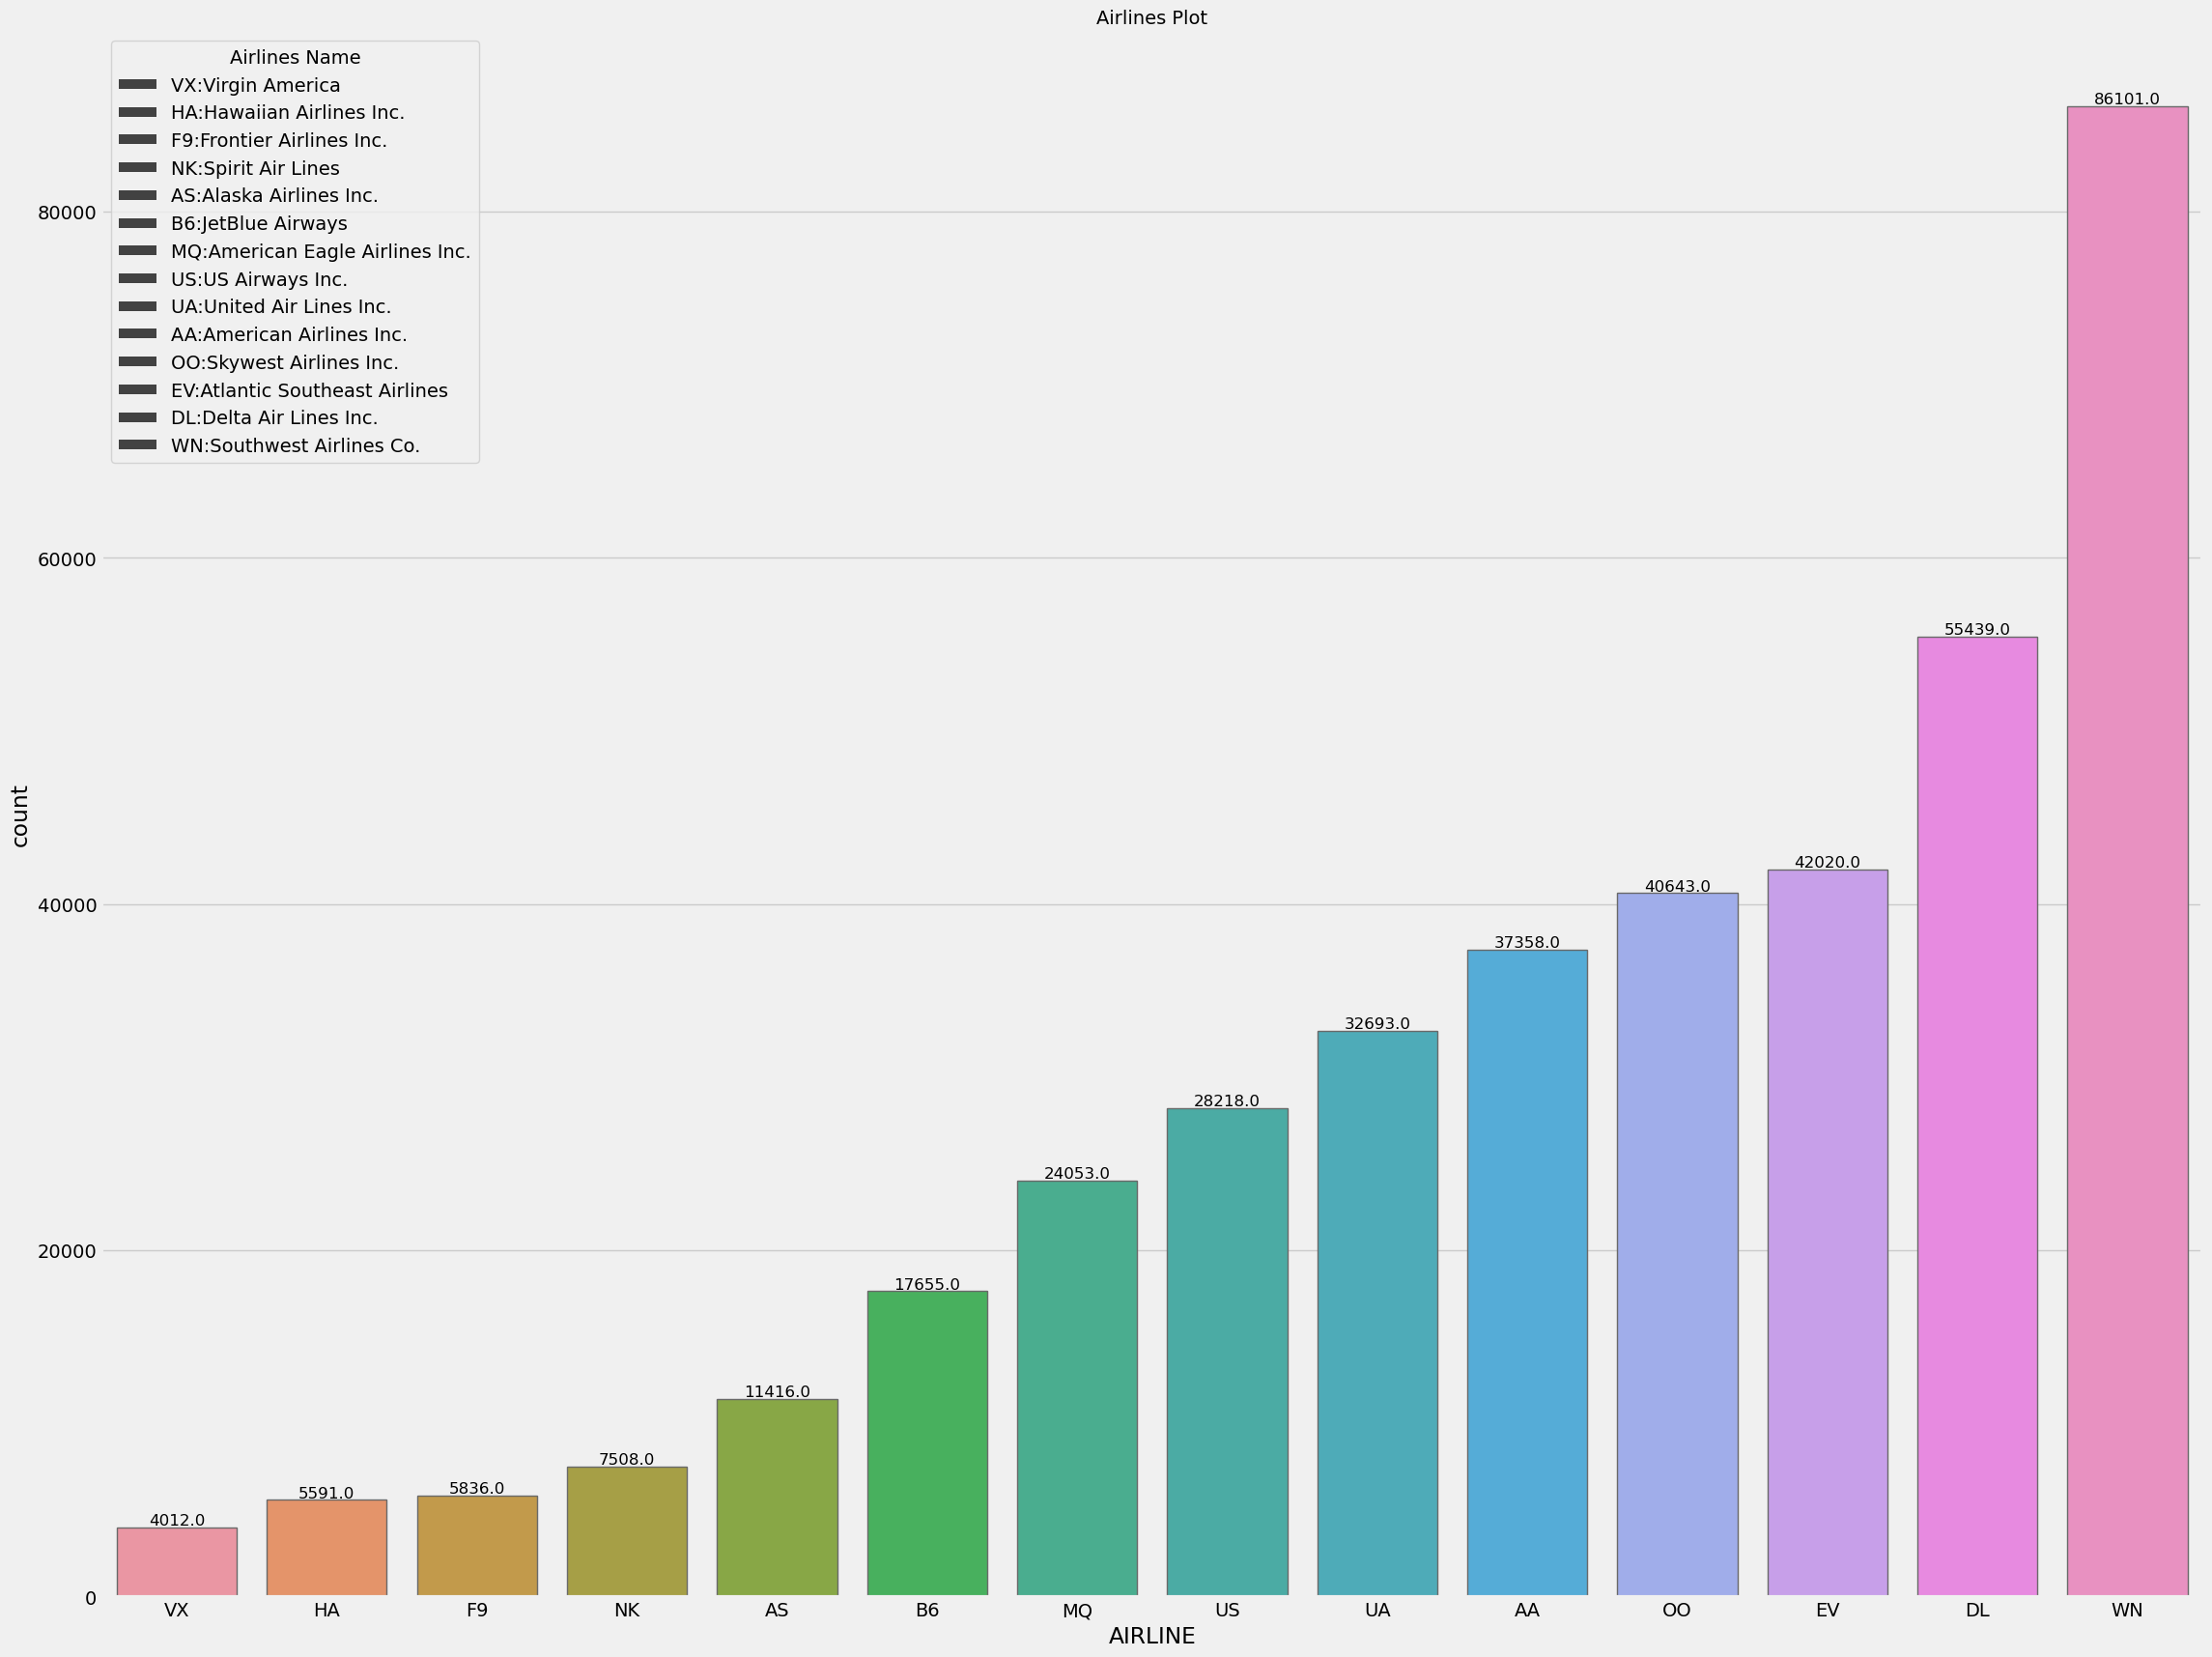

In [23]:

plt.figure(figsize=(25,20))
plt.title('Airlines Plot', fontsize=14)
ax = sns.barplot(x=global_stats.index, y=global_stats['count'], data=global_stats)
legend_labels = [f"{i + ':' + companies[i]}" for i in global_stats.index]
plt.legend(legend_labels, title='Airlines Name', loc='upper left')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12    , color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

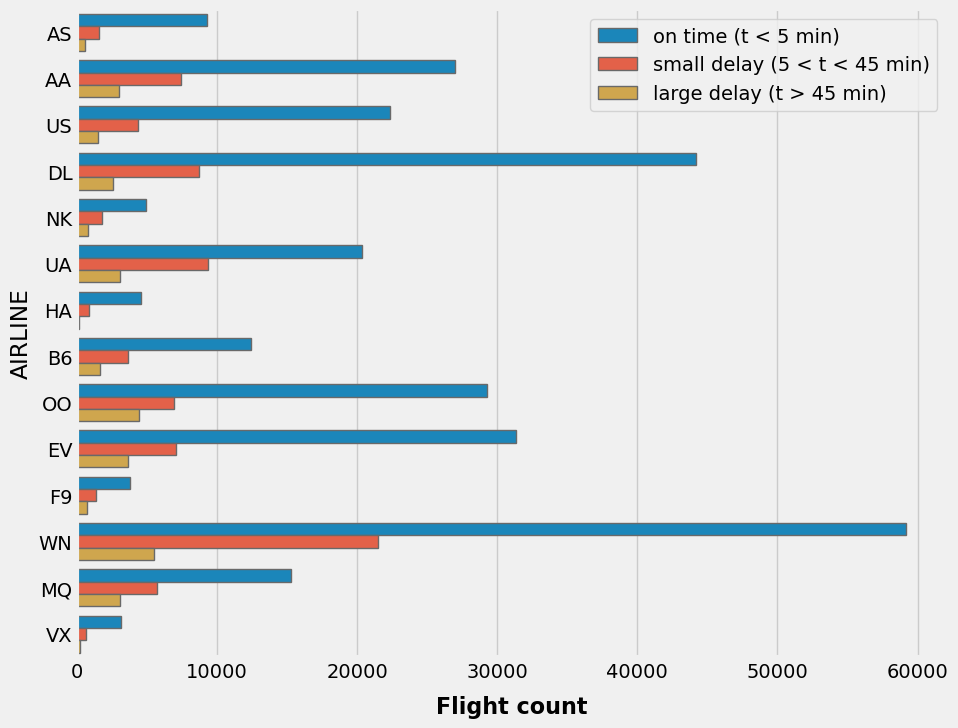

In [22]:
def delay_type(delay):
    if delay > 45:
        return 2
    elif delay > 5:
        return 1
    else:
        return 0

plt.figure(figsize=(10,8))
df_flights['DELAY_LEVEL'] = df_flights['DEPARTURE_DELAY'].apply(delay_type)
sns.countplot(y=df_flights["AIRLINE"], hue='DELAY_LEVEL', data=df_flights)

L = plt.legend()
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
# labels = [companies[item.get_text()] for item in ax.get_yticklabels()]
# ax.set_yticklabels(labels)


plt.show()

In [20]:
#At which day the delay is higher in January?
# DEPARTURE_DELAY = [f'{int(x // 60)}h{int(x % 60)}m' for x in df_flights['DEPARTURE_DELAY']]
delay_daily = df_flights.groupby(['DAY_OF_WEEK','AIRLINE'])['DEPARTURE_DELAY'].count().reset_index()
delay_daily['DEPARTURE_DELAY'] = delay_daily['DEPARTURE_DELAY'].apply(lambda x: (int(x // 60)))


pd.DataFrame(delay_daily)


,DAY_OF_WEEK,AIRLINE,DEPARTURE_DELAY
0,Friday,AA,120
1,Friday,AS,37
2,Friday,B6,60
3,Friday,DL,189
4,Friday,EV,144
...,...,...,...
79,Wednesday,OO,101
80,Wednesday,UA,81
81,Wednesday,US,73
82,Wednesday,VX,9


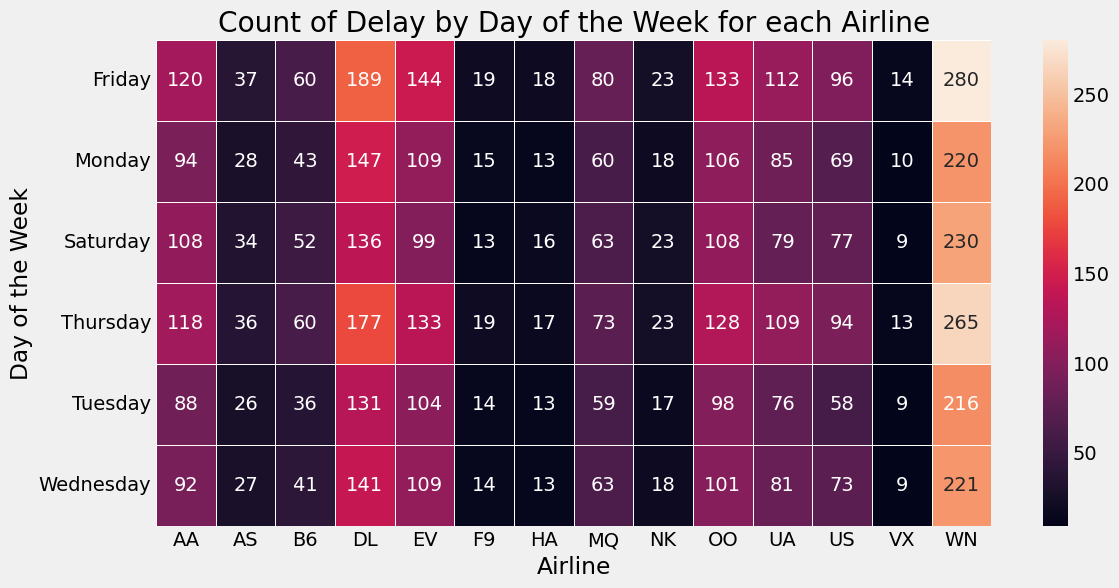

In [24]:
# Pivot the table for easier plotting
delay_daily_pivot = delay_daily.pivot(index='DAY_OF_WEEK', columns='AIRLINE', values='DEPARTURE_DELAY')
delay_daily_pivot
# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.heatmap(delay_daily_pivot, annot=True, fmt='d', linewidths=0.5)
plt.title('Count of Delay by Day of the Week for each Airline')
plt.xlabel('Airline')
plt.ylabel('Day of the Week')
plt.show()


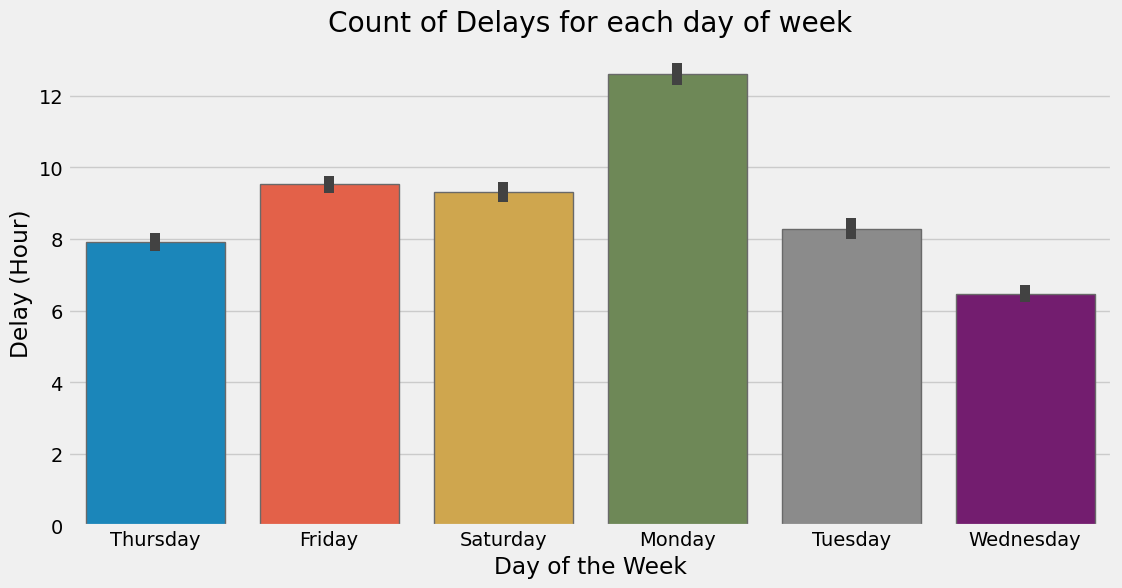

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df_flights['DAY_OF_WEEK'], y=df_flights['DEPARTURE_DELAY'], data=df_flights)
plt.title('Count of Delays for each day of week')
plt.xlabel('Day of the Week')
plt.ylabel('Delay (Hour)')
plt.show()